In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
CrimeDate=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Chicago_crime\CrimeDate (1).csv")
CrimeDesc=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Chicago_crime\CrimeDesc.csv")
CrimeLoc=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Chicago_crime\CrimeLocation.csv")

# Find most frequent types of crime  

In [3]:
grouped=CrimeDate.groupby("primary_type")["crime_count"].sum().reset_index().sort_values("crime_count",ascending=False)
grouped

primary_type  crime_count
32                              THEFT      1571376
2                             BATTERY      1381924
5                     CRIMINAL DAMAGE       851364
18                          NARCOTICS       731549
1                             ASSAULT       486798
24                      OTHER OFFENSE       466305
3                            BURGLARY       389577
17                MOTOR VEHICLE THEFT       325032
8                  DECEPTIVE PRACTICE       280256
29                            ROBBERY       268829
7                   CRIMINAL TRESPASS       209169
33                  WEAPONS VIOLATION        98483
25                       PROSTITUTION        68935
27             PUBLIC PEACE VIOLATION        50386
22         OFFENSE INVOLVING CHILDREN        38115
30                        SEX OFFENSE        20136
13   INTERFERENCE WITH PUBLIC OFFICER        17622
6             CRIMINAL SEXUAL ASSAULT        15755
16               LIQUOR LAW VIOLATION        14559
10                           GAMBLING        14509
11                           HOMICIDE         8815
0                               ARSON         3934
15                         KIDNAPPING         1653
14                       INTIMIDATION         1098
4   CONCEALED CARRY LICENSE VIOLATION          905
31                           STALKING          899
21                          OBSCENITY          610
26                   PUBLIC INDECENCY          188
23           OTHER NARCOTIC VIOLATION           98
19                       NON-CRIMINAL           21
12                  HUMAN TRAFFICKING            7
28                          RITUALISM            3
20   NON-CRIMINAL (SUBJECT SPECIFIED)            3
9                   DOMESTIC VIOLENCE            1

# Visualize crime location 

In [4]:
random=pd.DataFrame()
for year in CrimeLoc.year.unique():
    random=pd.concat([random,CrimeLoc[CrimeLoc.primary_type.isin(grouped["primary_type"].head(5))].sample(n=1000)])

In [5]:
fig=px.scatter(random.sort_values("year"),
               x="longitude",y="latitude",
              color="primary_type",
              #size="crime_count",
              hover_name="district",
              animation_frame="year")
fig.update_layout(title_text="Locations for 5 most frequent crime types in Chicago")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

# Visualize how frequency of 5 most popular crime types has been changing over time in Chicago

In [6]:
CrimeDate["date"]=pd.to_datetime(CrimeDate.date)

CrimeDate["year"]=CrimeDate.date.dt.year
CrimeDate["month"]=CrimeDate.date.dt.month
CrimeDate["month_name"]=CrimeDate.date.dt.month_name()

In [7]:
grouped=CrimeDate.groupby(["year","month","month_name","primary_type"])["crime_count"].mean().reset_index().sort_values(["year","month"])
grouped["date"]=grouped.year.astype(str)+" "+grouped.month_name
fig=px.bar(grouped[grouped.primary_type.isin(["ASSAULT","CRIMINAL DAMAGE","THEFT","NARCOTICS","BATTERY"])],
            x="date",y="crime_count",color="primary_type")
fig.update_layout(title_text="How frequency of 5 most popular crime types has been changing over time in Chicago")
fig.update_xaxes(title_text="")

fig.show()

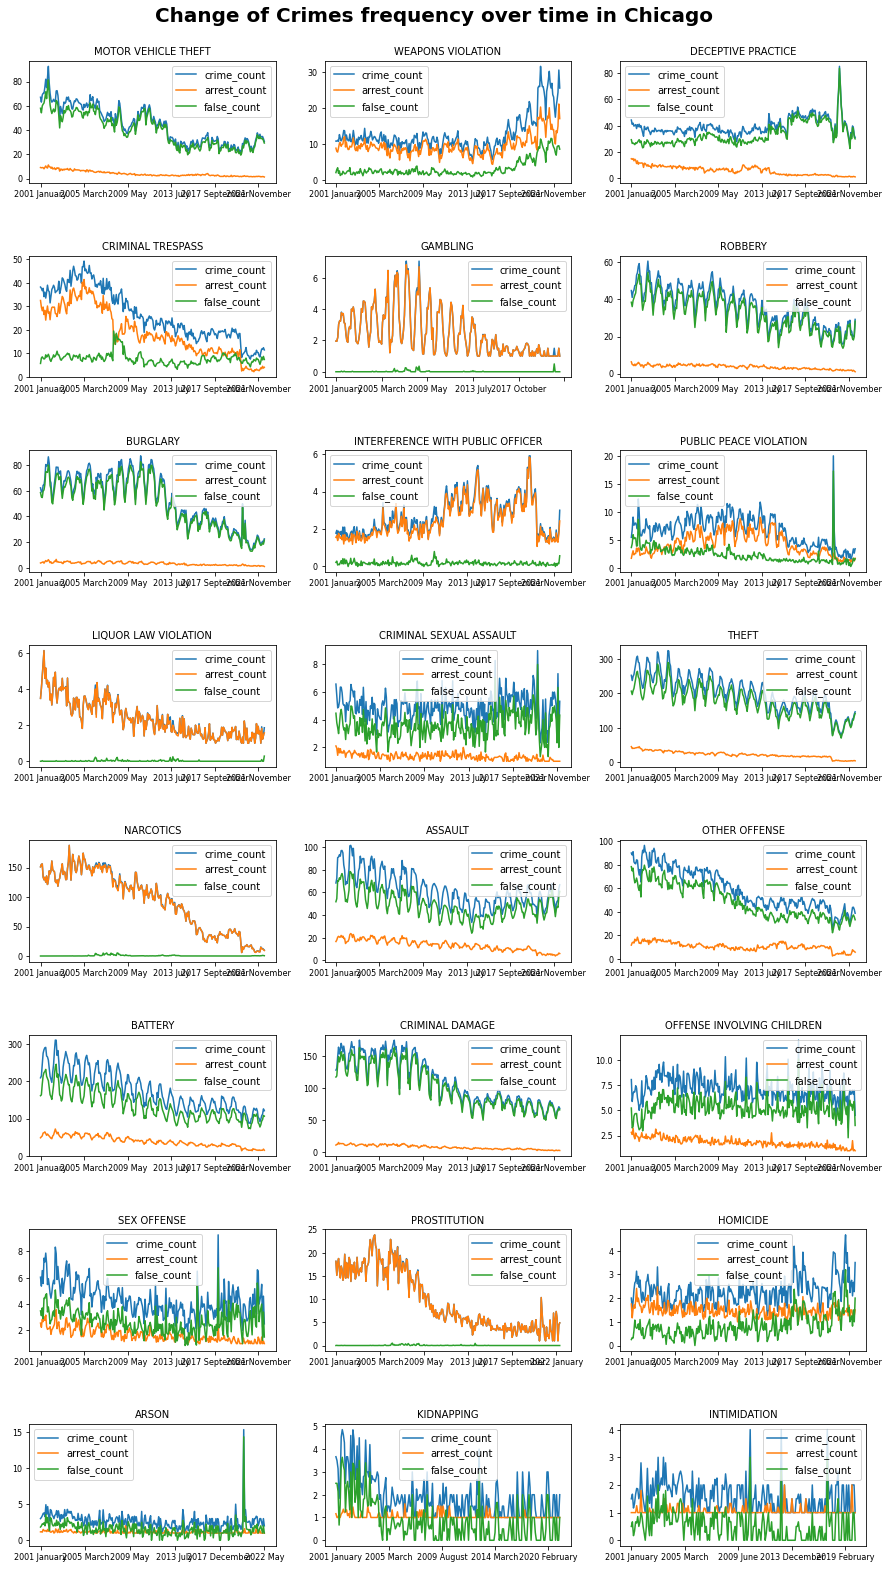

In [16]:
crime_types=CrimeDate.groupby("primary_type").filter(lambda x:x["crime_count"].sum()>1000).primary_type.unique()
fig,axes=plt.subplots(8,3,figsize=(15,25))
for ax,crime_type in zip(axes.ravel(),crime_types):
    grouped=CrimeDate[CrimeDate.primary_type==crime_type].groupby(["year","month","month_name","primary_type"]).agg({"crime_count":"mean","arrest_count":"mean","false_count":"mean"}).reset_index().sort_values(["year","month"])
    grouped["date"]=grouped.year.astype(str)+" "+grouped.month_name
    grouped.plot(ax=ax,kind="line",x="date",y=["crime_count","arrest_count","false_count"],xlabel="",fontsize=8)
    ax.set_title(crime_type,size=10)
    #ax.set_xticks(grouped.date,rotation=90)
plt.subplots_adjust(hspace=0.6,top=0.95)
plt.suptitle("Change of Crimes frequency over time in Chicago",size=20,fontweight="bold")
plt.show()

# Find most common crime types for each district for each year

In [9]:
crimes={}
for dist in sorted(CrimeLoc.district.unique()):
    for year in sorted(CrimeLoc.year.unique()):
        grouped=CrimeLoc[(CrimeLoc.year==year)&(CrimeLoc.district==dist)].groupby("primary_type")["crime_count"].sum().reset_index().sort_values("crime_count",ascending=False).head(1)
        crimes[year,dist]=grouped["primary_type"].to_string(index=False)
crimes

{(2001, 1.0): 'THEFT',
 (2002, 1.0): 'THEFT',
 (2003, 1.0): 'THEFT',
 (2004, 1.0): 'THEFT',
 (2005, 1.0): 'THEFT',
 (2006, 1.0): 'THEFT',
 (2007, 1.0): 'THEFT',
 (2008, 1.0): 'THEFT',
 (2009, 1.0): 'THEFT',
 (2010, 1.0): 'THEFT',
 (2011, 1.0): 'THEFT',
 (2012, 1.0): 'THEFT',
 (2013, 1.0): 'THEFT',
 (2014, 1.0): 'THEFT',
 (2015, 1.0): 'THEFT',
 (2016, 1.0): 'THEFT',
 (2017, 1.0): 'THEFT',
 (2018, 1.0): 'THEFT',
 (2019, 1.0): 'THEFT',
 (2020, 1.0): 'THEFT',
 (2021, 1.0): 'THEFT',
 (2022, 1.0): 'THEFT',
 (2001, 2.0): 'BATTERY',
 (2002, 2.0): 'BATTERY',
 (2003, 2.0): 'BATTERY',
 (2004, 2.0): 'BATTERY',
 (2005, 2.0): 'BATTERY',
 (2006, 2.0): 'BATTERY',
 (2007, 2.0): 'BATTERY',
 (2008, 2.0): 'BATTERY',
 (2009, 2.0): 'THEFT',
 (2010, 2.0): 'THEFT',
 (2011, 2.0): 'THEFT',
 (2012, 2.0): 'THEFT',
 (2013, 2.0): 'THEFT',
 (2014, 2.0): 'THEFT',
 (2015, 2.0): 'THEFT',
 (2016, 2.0): 'THEFT',
 (2017, 2.0): 'THEFT',
 (2018, 2.0): 'THEFT',
 (2019, 2.0): 'THEFT',
 (2020, 2.0): 'BATTERY',
 (2021, 2.0): 'T

# Find top criminal districts for each year 

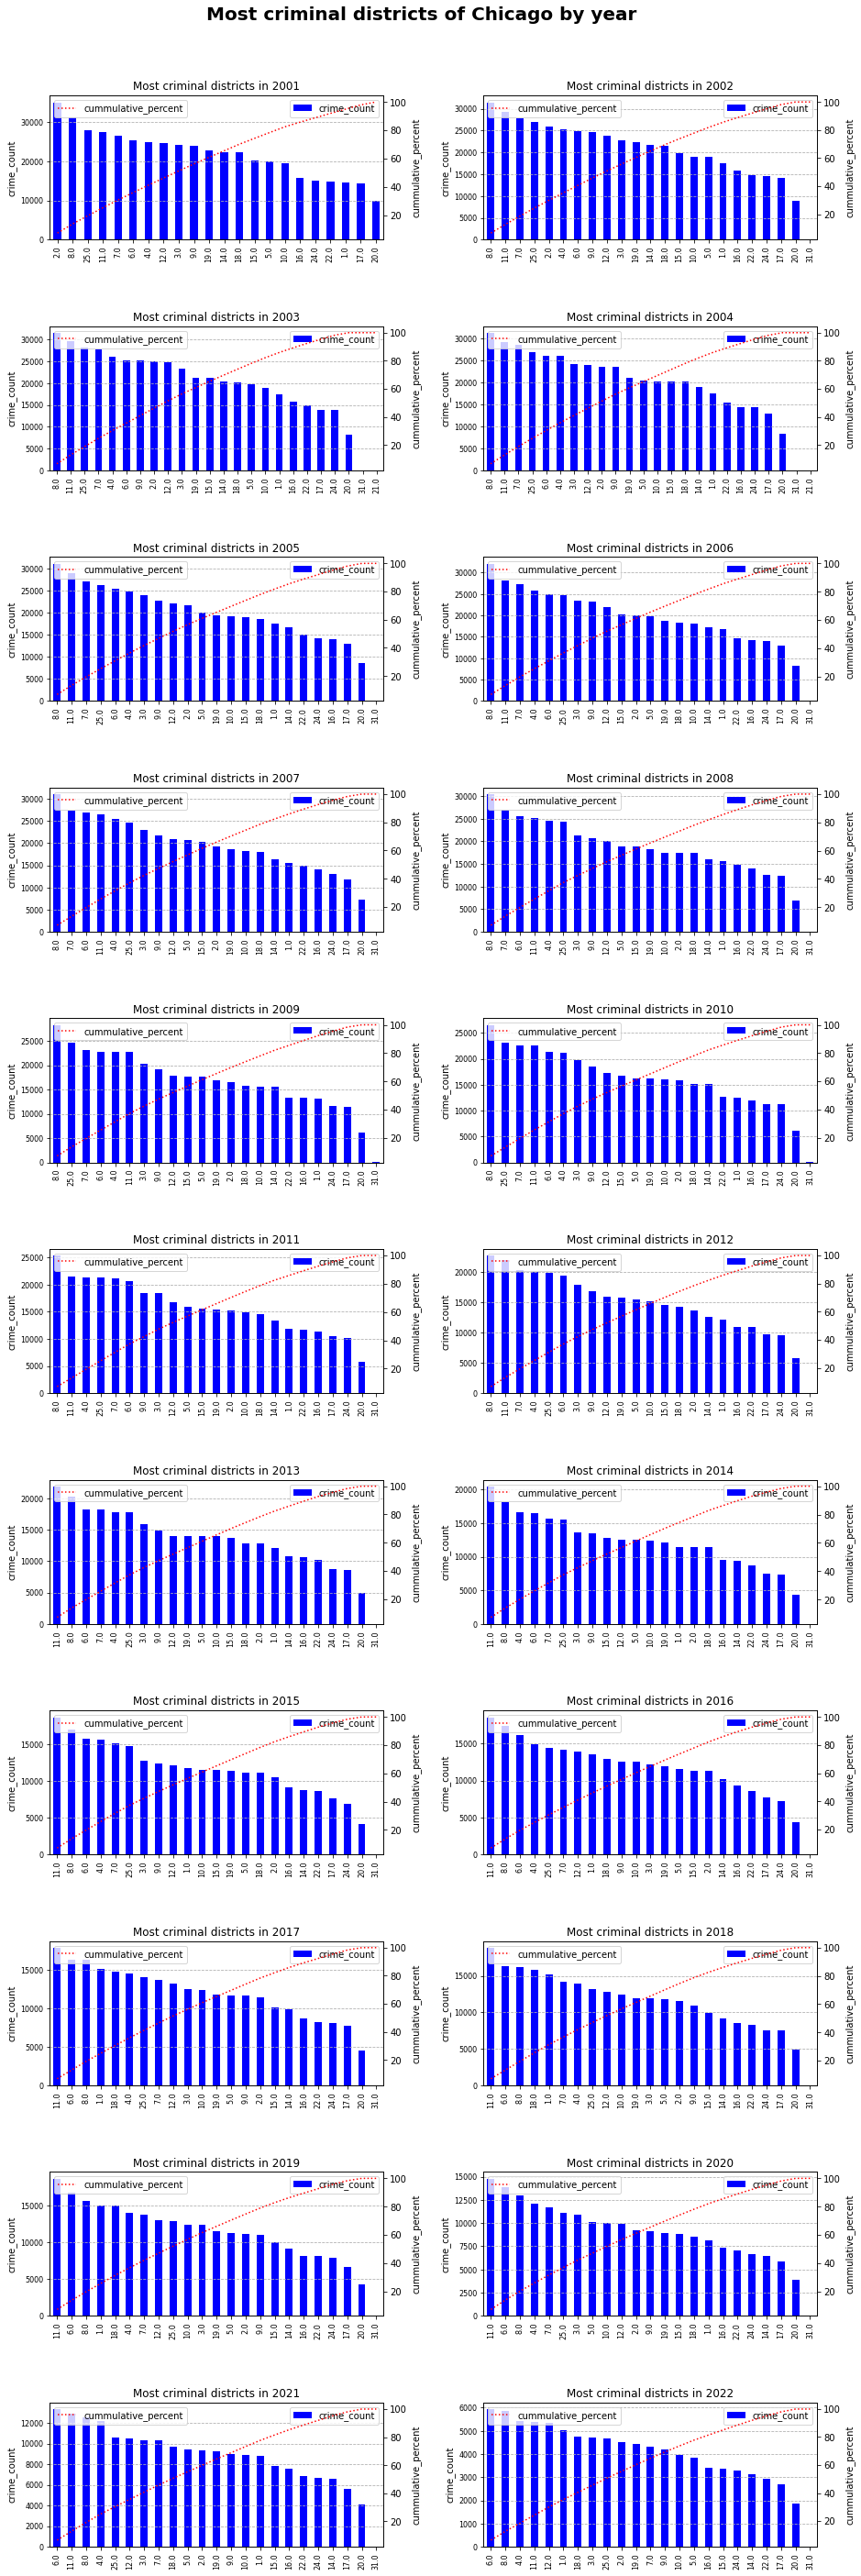

In [24]:
years=sorted(CrimeLoc.year.unique())
fig,axes=plt.subplots(11,2,figsize=(15,45))
for ax,year in zip(axes.ravel(),years):
    grouped=CrimeLoc[CrimeLoc.year==year].groupby("district")["crime_count"].sum().reset_index().sort_values("crime_count",ascending=False)
    grouped["cummulative_percent"]=(grouped.crime_count/grouped.crime_count.sum()*100).cumsum()
    grouped['district']=grouped['district'].astype(str)
    grouped.plot(kind="bar",ax=ax,x="district",y="crime_count",xlabel="",fontsize=8,ylabel="crime_count",color="b",label="crime_count")
    ax.set_title("Most criminal districts in "+str(year),size=12)
    ax2=ax.twinx()
    grouped.plot(kind="line",ax=ax2,x="district",y="cummulative_percent",ylabel="cummulative_percent",color="r",ls=":",label="cummulative_percent")
    ax.grid(axis="y",ls="--")
plt.suptitle("Most criminal districts of Chicago by year",size=20,fontweight="bold")
plt.subplots_adjust(hspace=0.6,wspace=0.3,top=0.95)
plt.show()

In [17]:
# district 8 was the most criminal district in Chicago since 2002 till 2012
# after district 8, district 11 became the most criminal district in Chicago between 2013 and 2020
# the last two years distict 6 is leading among the most criminal districts of Chicago
# district 20 and 31 seem to be the safest in Chicago